# Facebook Messanger Analyser
The goal of this thing is to get all the facebook messanger data you can get from your conversation history and analyse it into something real nice

## 1) IMPORT EVERYTHING and intital tidying

*This chapter

<ol>
  <li>Links path to all data files you want to test</li>
  <li>Loads it all as JSON files</li>
  <li>Converts all JSON files to panada data frames and concacts them into 1 mega frame</li>
  <li>converts time stamp data into actual timestamps</li>
  <li>... pulls month and year out of time stamps</li>
   <li>Import the basic libraries at the top here<\li>
</ol>


*To improve;
<ol>
    <li>Make it automatic the file importing stage</li>
<li>Make it general the file importing stage </li>
    <li>Check all imports for the 2 missing columns and add them in at the correct place<\li>
    <li><\li>
<ol>

In [1]:
#import all the normal stuff
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import json

In [2]:
#define global inputs
otherWords=['go','get','got'] # these are words added to stop words to remove them from the BoW analysis. Mostly useful when making a word cloud
graphsize=[18,10]

In [3]:
 #Set a path to all the facebook messanger data
pathToFile1=r"C:\Users\dilla\Desktop\python\message_1.json"
pathToFile2=r"C:\Users\dilla\Desktop\python\message_2.json"
pathToFile3=r"C:\Users\dilla\Desktop\python\message_3.json"
pathToFile4=r"C:\Users\dilla\Desktop\python\message_4.json"


In [4]:
#Just importing the Json file and exploring
with open(pathToFile1) as file:
    chat1=json.load(file)
with open(pathToFile2) as file:
    chat2=json.load(file)
with open(pathToFile3) as file:
    chat3=json.load(file)
with open(pathToFile4) as file:
    chat4=json.load(file)


In [5]:
#Turn the Jsons into 1 big dataframe
messages1= pd.DataFrame(chat1['messages'])
messages2= pd.DataFrame(chat2['messages'])
messages3= pd.DataFrame(chat3['messages'])
messages4= pd.DataFrame(chat4['messages'])
messages=pd.concat([messages1,messages2,messages3,messages4], sort=True)
messages.head()
#messages.tail()
#print(messages.info())


,audio_files,call_duration,content,files,gifs,missed,photos,reactions,sender_name,share,sticker,timestamp_ms,type,videos
0,NaN,NaN,Yes it is nice,NaN,NaN,NaN,NaN,NaN,Donna Lam,NaN,NaN,1578760486365,Generic,NaN
1,NaN,NaN,That's Nice,NaN,NaN,NaN,NaN,NaN,Dillan Patel,NaN,NaN,1578758176341,Generic,NaN
2,NaN,NaN,That's nice,NaN,NaN,NaN,NaN,NaN,Dillan Patel,NaN,NaN,1578758170762,Generic,NaN
3,NaN,NaN,Oh yeeeaaaa,NaN,NaN,NaN,NaN,NaN,Dillan Patel,NaN,NaN,1578758156382,Generic,NaN
4,NaN,NaN,Walnut eggplant?,NaN,NaN,NaN,NaN,NaN,Donna Lam,NaN,NaN,1578756470881,Generic,NaN


For some reason chat1 has 2 less columns that the rest. Its missing call duration and missed. I've passed sort=True to silence the warning... but proably something ot look into

In [6]:
#Convert the timestamp to readable times (month and year) and then seperating that out of the date
def convertTime(timestamp):
    return pd.to_datetime(timestamp,unit='ms')
messages['date']=messages['timestamp_ms'].apply(convertTime)
messages.index=messages['date']


In [7]:
#From the converted time stamp take out the month and year data __probably not too useful__
import datetime

def getMonth(date):
    return date.month

def getYear(date):
    return date.year

def getHour(date):
    return date.hour

def getDay(date):
    return date.weekday()

messages['day']=messages['date'].apply(getDay)
messages.head()

,audio_files,call_duration,content,files,gifs,missed,photos,reactions,sender_name,share,sticker,timestamp_ms,type,videos,date,day
date,,,,,,,,,,,,,,,,
2020-01-11 16:34:46.365,NaN,NaN,Yes it is nice,NaN,NaN,NaN,NaN,NaN,Donna Lam,NaN,NaN,1578760486365,Generic,NaN,2020-01-11 16:34:46.365,5
2020-01-11 15:56:16.341,NaN,NaN,That's Nice,NaN,NaN,NaN,NaN,NaN,Dillan Patel,NaN,NaN,1578758176341,Generic,NaN,2020-01-11 15:56:16.341,5
2020-01-11 15:56:10.762,NaN,NaN,That's nice,NaN,NaN,NaN,NaN,NaN,Dillan Patel,NaN,NaN,1578758170762,Generic,NaN,2020-01-11 15:56:10.762,5
2020-01-11 15:55:56.382,NaN,NaN,Oh yeeeaaaa,NaN,NaN,NaN,NaN,NaN,Dillan Patel,NaN,NaN,1578758156382,Generic,NaN,2020-01-11 15:55:56.382,5
2020-01-11 15:27:50.881,NaN,NaN,Walnut eggplant?,NaN,NaN,NaN,NaN,NaN,Donna Lam,NaN,NaN,1578756470881,Generic,NaN,2020-01-11 15:27:50.881,5


In [8]:
#Force messages to be a string instead of an object 
messages['stringContent']=messages['content'].astype(str)


# 2 Basic exploratary analysis

You want a graph that shows how call lengths have changed through the years



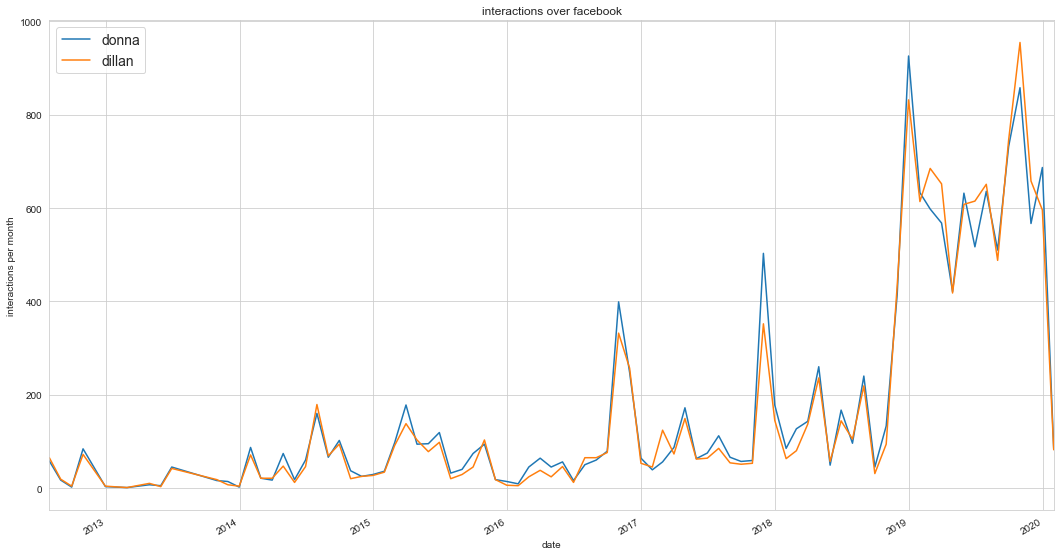

In [9]:
#See how often we message each other through the years
#count how many interactions we have per month and group that by person and by month
messageCounts=messages.groupby(['sender_name',pd.Grouper(freq="M")]).count()
donna=messageCounts.loc['Donna Lam']['content'].plot()
dillan=messageCounts.loc['Dillan Patel']['content'].plot(figsize=graphsize)

plt.title('interactions over facebook')
plt.ylabel('interactions per month')
plt.legend(['donna','dillan'],prop={'size': 14})


In [10]:
#extract calling info from main df
calls_df=messages[['call_duration','sender_name','content','day']]
calls_df=calls_df.dropna()

In [11]:
#remove the outlier calls and make the time more understandable (minutes)
smallcalls= calls_df[calls_df['call_duration']<100000]
smallcalls['minutes']=smallcalls['call_duration']/60
smallcalls.describe()

C:\Users\dilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,call_duration,day,minutes
count,629.000000,629.000000,629.000000
mean,471.211447,2.826709,7.853524
std,843.652301,1.994463,14.060872
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,16.000000,3.000000,0.266667
75%,653.000000,5.000000,10.883333
max,7375.000000,6.000000,122.916667


In [12]:
#remove all the missed calls to get a dataset where we pick up
pickedUpCalls=smallcalls[smallcalls['call_duration']>0]
pickedUpCalls['minutes'].describe()

count    329.000000
mean      15.014792
std       16.452536
min        0.016667
25%        2.800000
50%        9.483333
75%       22.066667
max      122.916667
Name: minutes, dtype: float64

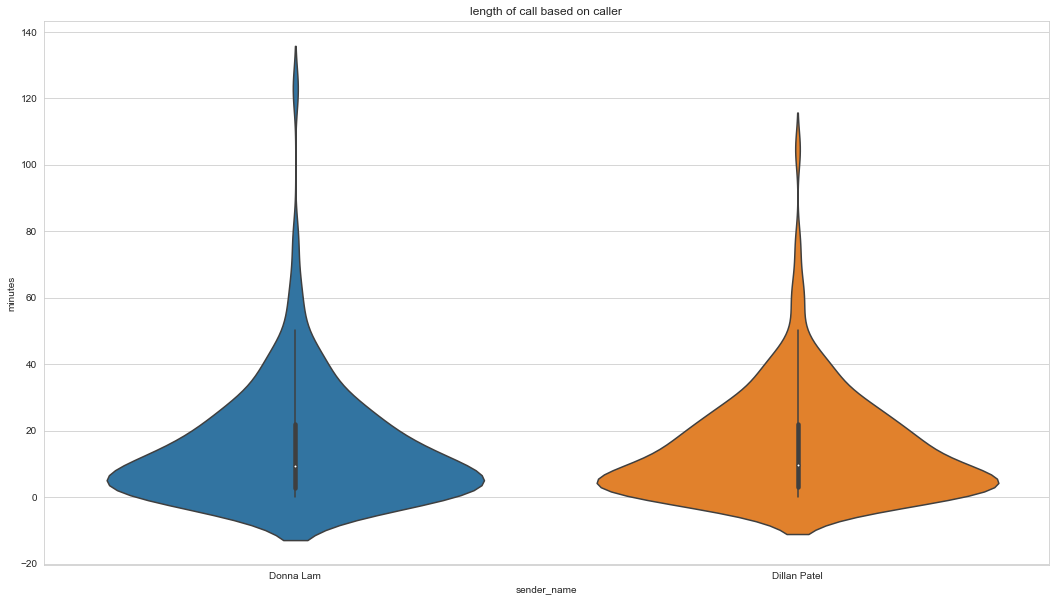

In [13]:
plt.figure(figsize=graphsize)
plt.title('length of call based on caller')
b=sns.violinplot(x=pickedUpCalls['sender_name'], y=pickedUpCalls['minutes'])


Text(0.5, 1.0, 'length of calls distribution for all')

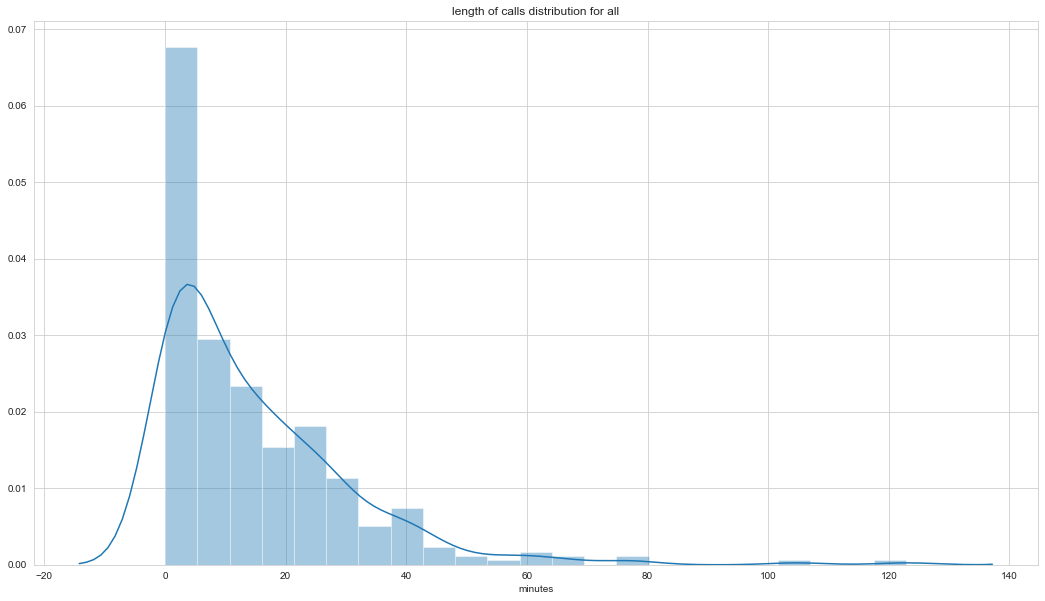

In [14]:

plt.figure(figsize=graphsize)
sns.distplot(pickedUpCalls['minutes'])
plt.title('length of calls distribution for all')

In [15]:
#calculate the % of calls the person picks up.
#done by counting the number of missed calls/ total calls sent to them

missed=smallcalls[smallcalls['minutes']==0].groupby('sender_name').count()
tot=smallcalls.groupby('sender_name').count()

missed=missed['minutes']
tot=tot['minutes']

Dillanpickuprate= 1-missed['Dillan Patel']/tot['Donna Lam']
Donnapickuprate= 1-missed['Donna Lam']/tot['Dillan Patel']

Text(0, 0.5, 'liklihood they pick up')

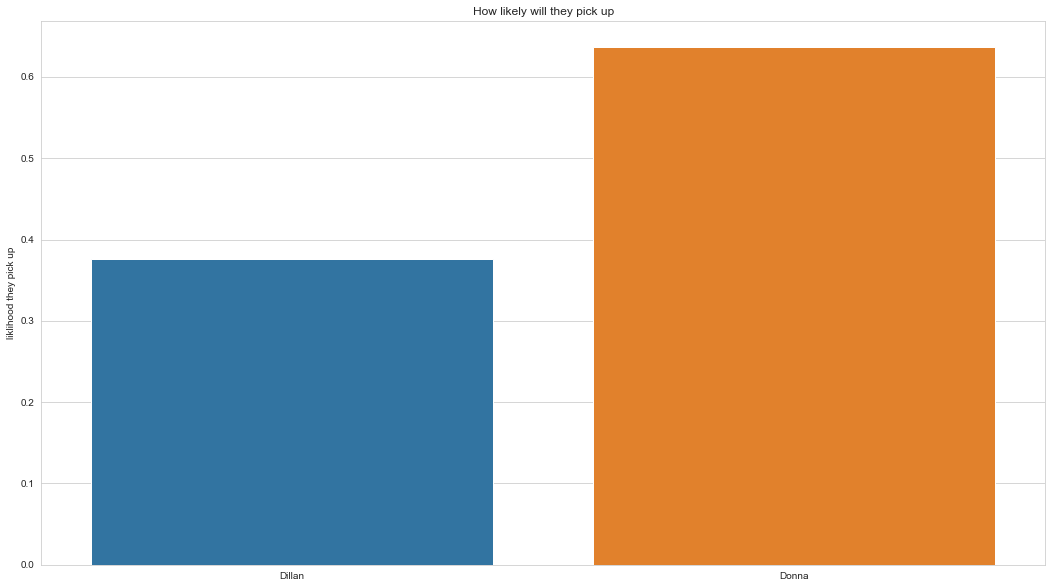

In [16]:
plt.figure(figsize=graphsize)
sns.barplot(x=['Dillan','Donna'],y=[Dillanpickuprate,Donnapickuprate])
plt.title('How likely will they pick up')
plt.ylabel("liklihood they pick up") 


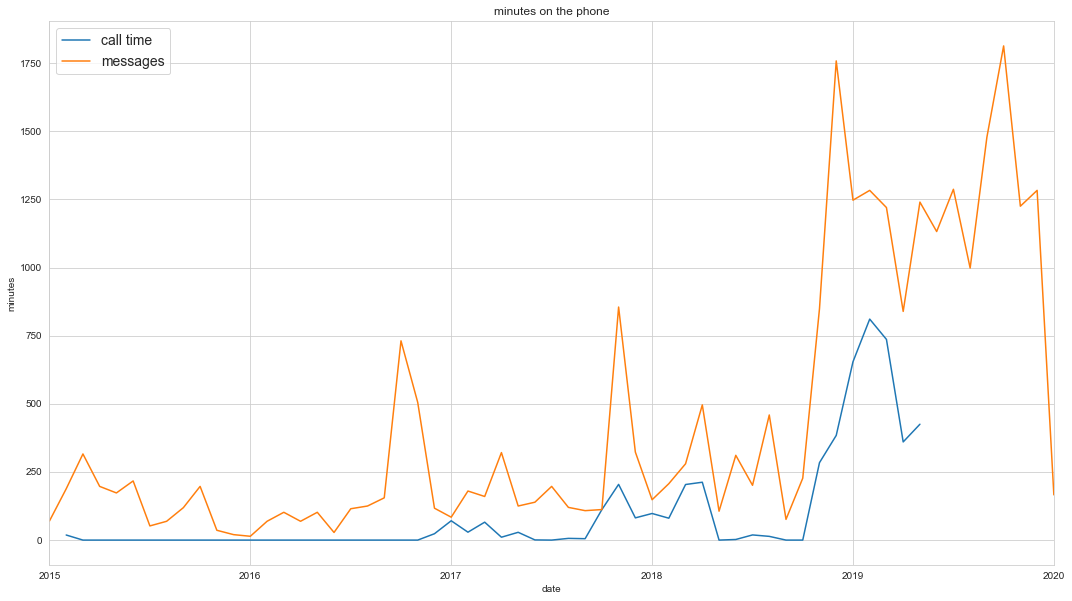

In [17]:
#plot when we are on the phone the most since we started using FB and overlay all our interactions
callminutespermonth=pickedUpCalls.groupby(pd.Grouper(freq="M")).sum()
contentCount=messages.groupby(pd.Grouper(freq="M")).count()

plt.figure(figsize=graphsize)

callminutespermonth.loc["2015":"2020"]['minutes'].plot()
contentCount.loc["2015":"2020"]['content'].plot()

plt.title('minutes on the phone')
plt.ylabel('minutes')
plt.legend(['call time','messages'],prop={'size': 14})
plt.axvspan(2019, 2020, color='red', alpha=0.5)


for some reason FB stopped recording call data in 2019 or my export was funny

Text(0.5, 0, 'time of day')

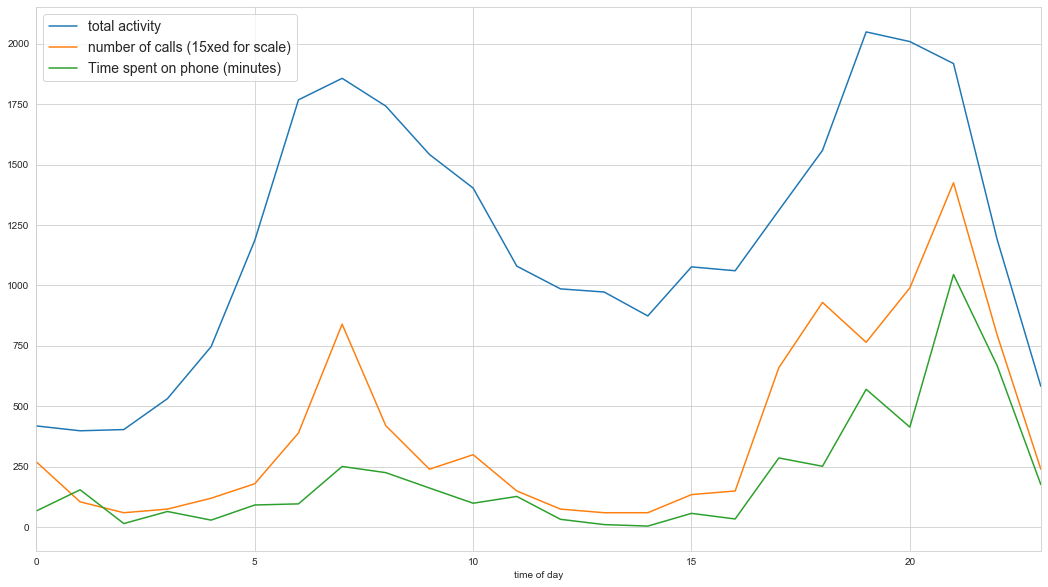

In [18]:
#see how we message each other during the day and overlay it with call data
callhours=pickedUpCalls.groupby(pickedUpCalls.index.hour).sum()
callcount=smallcalls.groupby(smallcalls.index.hour).count()
callcount['scaledminutes']=callcount['minutes']*15
contenthours=messages.groupby(messages.index.hour).count()

contenthours['content'].plot(figsize=graphsize)
callcount['scaledminutes'].plot()
callhours['minutes'].plot()
plt.legend(['total activity ','number of calls (15xed for scale)','Time spent on phone (minutes)'],prop={'size': 14})
plt.xlabel('time of day')

In [19]:
# seerate by weekday and weekend
weekdays=smallcalls[smallcalls['day'] <= 4]
weekend=smallcalls[smallcalls['day'] > 4]

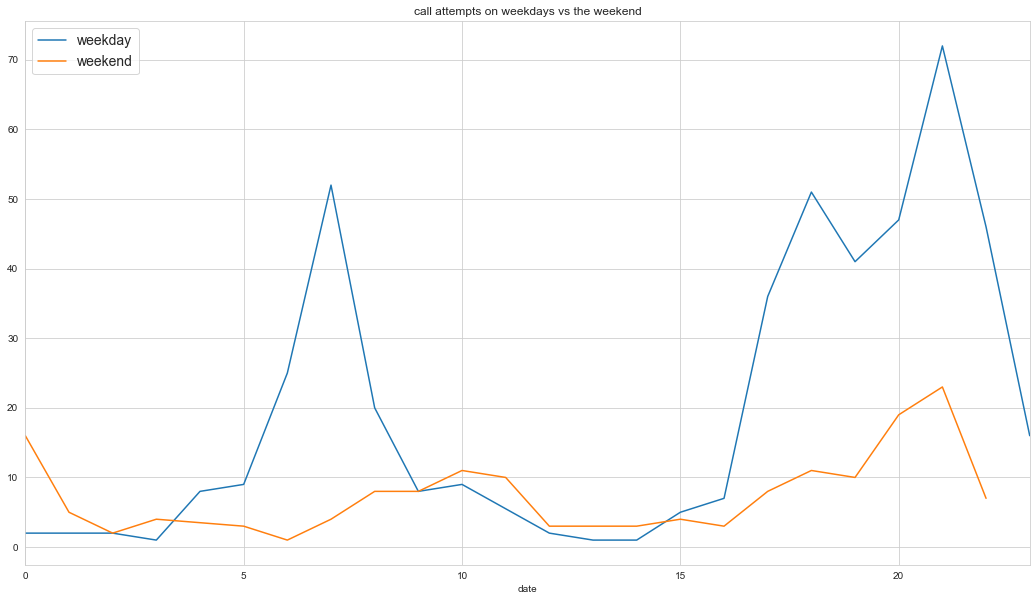

In [20]:
#plot all call attempts based on time of week
wd=weekdays.groupby(weekdays.index.hour).count()
we=weekend.groupby(weekend.index.hour).count()
wd['content'].plot(figsize=graphsize)
we['content'].plot()
plt.title('call attempts on weekdays vs the weekend')
plt.legend(['weekday','weekend'],prop={'size': 14})

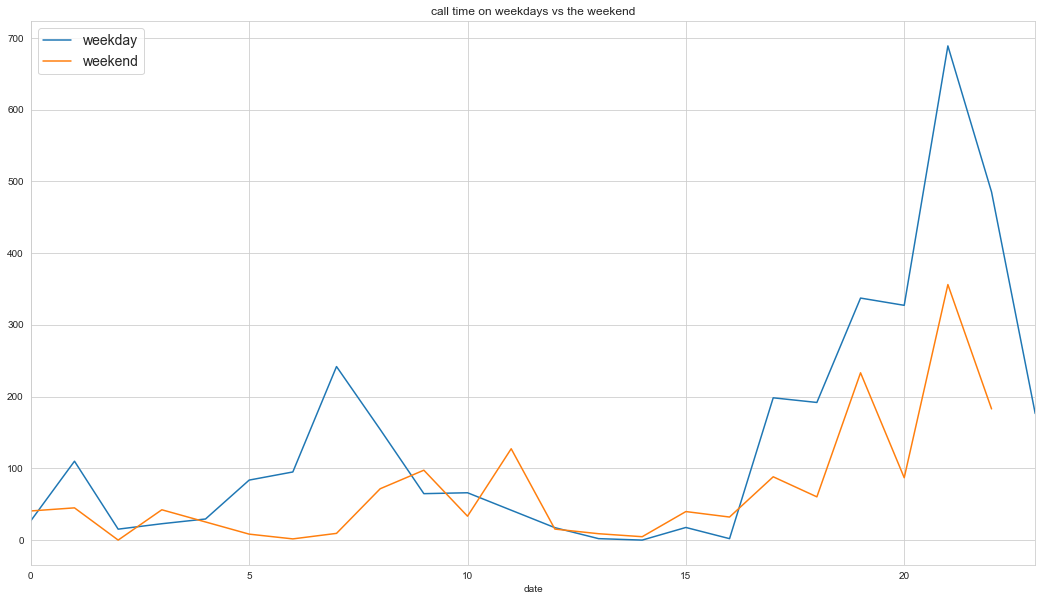

In [21]:
#plot call length of different times of day depending on day of the week
wd=weekdays.groupby(weekdays.index.hour).sum()
we=weekend.groupby(weekend.index.hour).sum()
wd['minutes'].plot(figsize=graphsize)
we['minutes'].plot()
plt.title('call time on weekdays vs the weekend')
plt.legend(['weekday','weekend'],prop={'size': 14})


## 2.1 Summary
<ol>
    <li>messaging spikes everytime one of us go international and then drops to something sustainable<\li>
    <li>After long distance's normal spike, my messaging got way more consistent. Even after living together in june july 2019 it was up<\li>
    <li>Dillan only picks up the phone 30% of the time. Mostly misses calls on weekday mornings<\li>
    <li>Most activity happns before 10, post work and pre bed <\li>
    <li> All the long calls happen in the afternoon night time<\li>      
    <li>Same amount of call attmpts made in the morning but often the are not picked up or they are super short<\li>
    <li>weeked communication peak shifts out to 10am. They also shift out to midnight<\li>
    <li>Dillan misses most of  calls. Almost exclusively when he's called in the morning.<\li>
<ol>



# 3 BoW natural language processing

## 3.1 Functions

All of the functions that clean the individual text and sorts the words to from most used too least

In [22]:
#This function will tidy any facebook messanger dataset. It removes capital letters, punctuation, numbers, stopwords,
#stems words and any other words. 

# You input a dataframe of your words and a set of "other words" you'd like to remove

#It then returns a list and string containing all of the original words

def BoWCleaner(df,otherWords):
    
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    from nltk.tokenize import word_tokenize
    from nltk.stem.porter import PorterStemmer

    #remove all the NA lines (which contains call info) and turn it into one MASSIVE string.Then convert this string into an array of each individual word
    BoW= " ".join(word for word in df['content'].dropna())
    BoW= BoW.split()

    # convert to lower case
    tokens = [w.lower() for w in BoW]

    #extract everything is alphanumeric words
    words = [word for word in tokens if word.isalpha()]

    #make haha and hahaha and hahahaha and hahahahaha equal to haha. Its all laughter        
    y=[]
    for x in words: 
        if x in ['hahaha','hahahaha', 'hahahahaha']: 
            y.append('haha')
        else:
            y.append(x)
    words=y  
    
    #remove all the stop words in the corpus
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

    #add additional words to remove to stopwords set and the remove it from the original BoW
    other_words=set(otherWords)
    stop_words.update(other_words)
    noStopWords = [w for w in words if not w in stop_words]
    
    #stem the remaining words
    porter = PorterStemmer()
    stemmedWords = [porter.stem(word) for word in noStopWords]
    
        
    #have a list of the BoW and a massive string for BoW.
    listBoW=stemmedWords
    stringBoW= " ".join(word for word in listBoW)
        
        
    return listBoW, stringBoW

In [23]:
#function that gets a list of all unique words in a dataset
def uniqueWords(listOfWords):
    
    unique=[]
    
    for word in listOfWords :
        if word not in unique :
            unique.append(word)
            
    return unique


In [24]:
# Function that counts the number of each unique word from a list and returns a list of counts
def wordFreq (listOfWords):
    
    #get list of unique words    
    unique=uniqueWords(listOfWords)
    
    freq=[]
    
    #count all occurances of the unique words in the BoW
    for word in unique:
        freq.append(listOfWords.count(word))
    
    return freq

In [25]:
#zip together the words with their frequency and then orders them
def SortWords(listOfWords):
    
    #use function defined above to generate list of unique words and frequency
    unique=uniqueWords(listOfWords)
    freq=wordFreq (listOfWords)
    
    #convert outputs aboce to dfs because I find it easier to work with
    uniquedf=pd.DataFrame(unique)
    freqdf=pd.DataFrame(freq)
    
    #merge the unique words and frequency counts together
    df = pd.merge(uniquedf, freqdf, right_index=True, left_index=True)
    df.columns=['word','freq']
    
    #sort unique words by frequency
    df.sort_values(by=['freq'], inplace=True, ascending=False)

    return df

In [26]:
#a standar plotting function so all the plots look the same
def plotTopWords (df,x):
    plt.figure(figsize=graphsize)
    g=sns.barplot(x='word',y='freq',data= df[:x])
    plt.xticks(fontsize=20, rotation=90)
    return

## 3.2 Analysing data

Everything below here is analysing the datasets.

<ol>
 <li>It seperates big dataset into indiviudal senders<\li>
 <li>Creates a BoW list and string<\li>
 <li>Finds all the unique words in the data set, counts them and sorts the remainder into a "sorted df"<\li>
<ol>

In [27]:
#Clean all of dillans text
dillan_df=messages[messages['sender_name'] == 'Dillan Patel']
dillan_list, dillan_string= BoWCleaner(dillan_df,otherWords)
dillan_sorted=SortWords(dillan_list)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dilla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dilla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


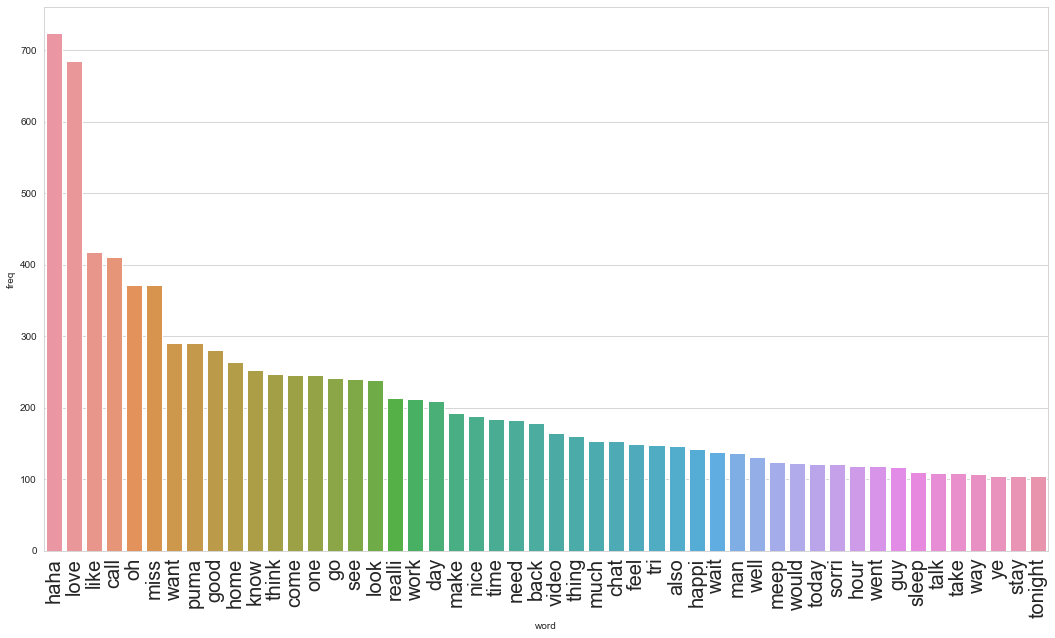

In [28]:
plotTopWords(dillan_sorted,50)

In [29]:
#Clean all of Donna's text

donna_df=messages[messages['sender_name'] == 'Donna Lam']
donna_list, donna_string= BoWCleaner(donna_df,otherWords)
donna_sorted=SortWords(donna_list)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dilla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dilla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


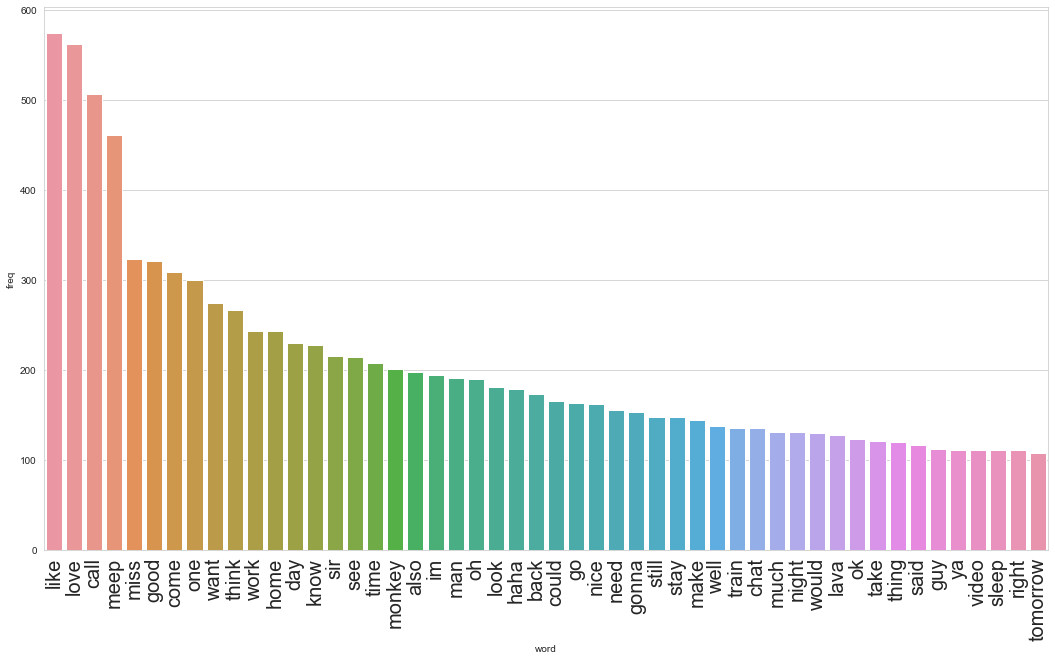

In [30]:
plotTopWords(donna_sorted,50)

# 3 Make a word cloud


Put all that stuff you did above to make a word cloud
the analysis was all sourced from some dudes datacamp article here: https://www.datacamp.com/community/tutorials/wordcloud-python

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [32]:
#function that makes the wordcloud object and plot it. title is title of the graph. string is the list of words
#as 1 big string eg dillan_string

def wordcloud(title,string):
    wordcloud = WordCloud(background_color="white",width = 1600 , height = 1600, max_words=100).generate(string)
    plt.figure(figsize=[14,14])
    plt.axis('off')
    plt.title(title, fontsize= 60)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    return

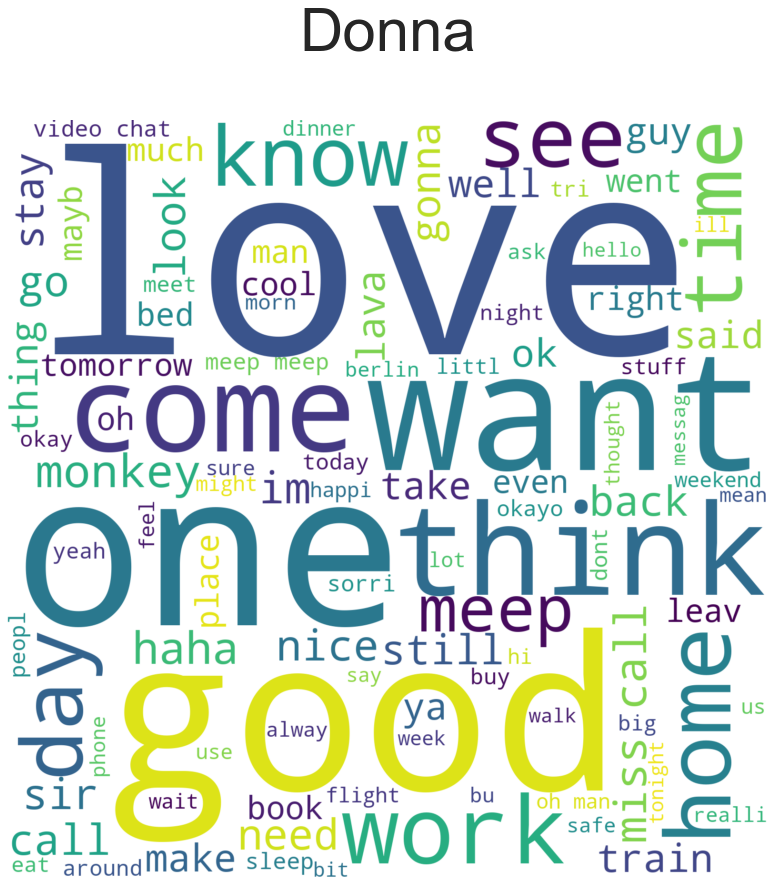

In [33]:
# wordcloud function
wordcloud("Donna\n",donna_string)

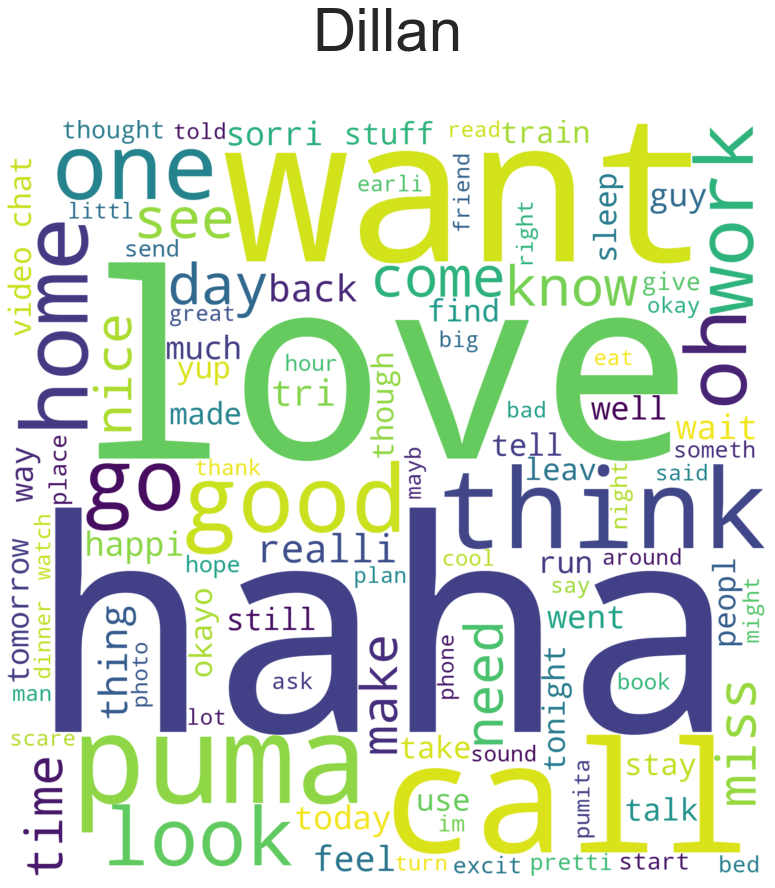

In [34]:
wordcloud("Dillan\n",dillan_string)

## Sentiment Analysis

Using NLTK go through all our messages and see who uses more positive words in the conversation

To improve
<ol>
    <li>Generalise everything</li>
    <li>Clean data up better in previous chapter so you don't need to force everything to be a a string</li>
    <li>Analyse whats happening at the peaks</li>
    <li>Make a conversation function so its easy to read whats happening between 2 dats and rad who's saying what</li>
<ol>

In [35]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dilla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
#create a sentiment analyser object and put it into a function
sentiment_analyzer=SentimentIntensityAnalyzer()

def getPolarity(text):
    return sentiment_analyzer.polarity_scores(text)['compound']

messages['sentiment']=messages['stringContent'].apply(getPolarity)

In [37]:
#find the average sentiment everymonth of the year for each person
monthlySentiment=messages.groupby(['month','year','sender_name']).mean().reset_index()


KeyError: 'month'

In [ ]:
#create individual DFs so you can plot it easily below
dillan= monthlySentiment[monthlySentiment['sender_name']=='Dillan Patel']
donna= monthlySentiment[monthlySentiment['sender_name']=="Donna Lam"]

In [ ]:
#Plotting results of the sentiment analysis for each person
plt.plot (dillan['sentiment'], label = 'Dillan')
plt.plot(donna['sentiment'], label = 'Donna')
plt.legend()

In [ ]:
sns.violinplot(x='sender_name', y='sentiment', data=messages)

It looks like Dillan has more positive peaks compared to donnas one.... but I gotta spend more time here

# Predict who said a sentance
